# Lab 4: Filtering 

การทำ Image Filtering ด้วยวิธี Convolution จะให้ค่า Pixel ใหม่ที่เกิดจากค่า Pixel เดิมและ Pixel ในบริเวณนั้น ซึ่งถ้าหากเลือก Kernel/Filter หรือค่าน้ำหนักของแต่ละ Pixel ที่แตกต่างกันไป ก็จะให้ผลลัพธ์ที่บ่งบอกคุณลักษณะของภาพที่แตกต่างกันไป ***โดยในแล็บนี้ เราจะดู Filtering ที่มีพื้นฐานจากวิธี Convolution 4 แบบด้วยกัน*** คือ 
1. Gaussian Blur
2. Sobel Operator
3. Edge Canny Algorithm
4. Gabor Filter

**References**
1. https://www.opencv-srf.com/2018/03/gaussian-blur.html
2. https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm
3. https://docs.opencv.org/4.x/d2/d2c/tutorial_sobel_derivatives.html
4. https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm
5. https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html
6. https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/TRAPP1/filter.html




In [1]:
import cv2
import numpy as np
from skimage import data, color
from skimage.feature import canny
import matplotlib.pyplot as plt
%matplotlib inline

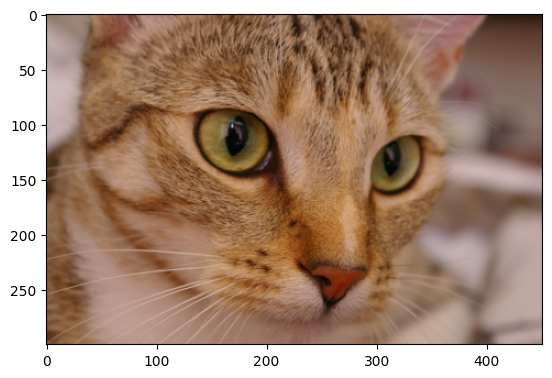

In [2]:
#@title Select Image {run: 'auto'}
image_name = 'cat' #@param ['astronaut', 'camera', 'cat', 'coffee', 'checkerboard', 'page']

image = getattr(data, image_name)()

if image.ndim < 3:
    plt.imshow(image, cmap='gray')
else:
    plt.imshow(image)
plt.show()

## 1. Gaussian Blur

การกำหนด Kernel แบบนี้จะเป็นการเบลอภาพ  โดยสูตรที่ใช้คำนวณ Kernel คือ Gaussian Distribution ที่มีสูตรดังนี้

<img src="https://homepages.inf.ed.ac.uk/rbf/HIPR2/eqns/eqngaus2.gif" alt= "Gaussian Blur Formula" width="250px">

ค่า $X$ และ $Y$ คือ ระยะห่างจากจุดกึ่งกลางของ Kernel ในแกน X และ Y อย่างเช่น Gaussian Distribution ที่มีค่าเฉลี่ย $\mu=0$ และค่าความแปรปรวน $\sigma=0$ Kernel ก็จะมีลักษณะดังกราฟ

<img src="https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/gauss2.gif" alt= "Gaussian Blur Graph" width="250px">

ตัวอย่าง Kernel ขนาด 5 x 5 ที่มีค่าเฉลี่ย $\mu=0$ และค่าความแปรปรวน $\sigma=0$  ซึ่งจะต้องแปลงเป็น Discrete ให้เหมือน Pixel ก็จะได้เป็นเมทริกซ์ดังภาพ

<img src="https://1.bp.blogspot.com/-KU3YUO8aImk/Uj8cDkwpcoI/AAAAAAAAAfY/uJ0Qy6fPIDImlk0lueZ4YVO3-6BE4rUHQCPcBGAYYCw/s1600/Gaussian%2BKernel.png" alt= "Gaussian Blur Matrix" width="250px">

ซึ่งคำนวณได้ด้วยฟังก์ชัน `GaussianBlur`

ให้ลองปรับขนาด Kernel และ ค่าความแปรปรวนดูว่าภาพที่ได้ต่างจากเดิมอย่างไร (ค่าเฉลี่ยจะใช้ 0 เสมอ ส่วนสาเหตุให้เป็นการบ้าน)


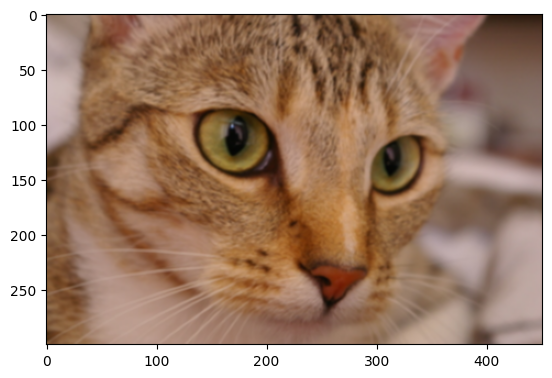

In [3]:
#@title Gaussian Blur {run: 'auto'}
kernel_size = 3 #@param {type:"slider", min:3, max:21, step:2}
sigma = 1 #@param {type:"slider", min:0.1, max:10, step:0.1}

dst = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

if image.ndim < 3:
    plt.imshow(dst, cmap='gray')
else:
    plt.imshow(dst)
plt.show()

## 2. Sobel Operator

Kernel แบบนี้ใช้สำหรับหา Edge หรือขอบของวัตถุในภาพ ไว้ใช้สำหรับระบุขอบเขตของวัตถุในภาพ โดยการคำนวณ Image Derivative ซึ่งเป็นการคำนวณหาผลต่างของค่า Pixel ในแนวนอนและแนวตั้ง

สำหรับ Image derivative ในแกน X ที่ Kernel ขนาด 3 x 3 จะใช้เมทริกซ์ต่อไปนี้
$$ \begin{bmatrix}-1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix} $$

สำหรับ Image derivative ในแกน Y ที่ Kernel ขนาด 3 x 3 จะใช้เมทริกซ์ต่อไปนี้
$$ \begin{bmatrix}-1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix} $$

ซึ่งสามารถคำนวณได้ด้วยฟังก์ชัน `Sobel`

ให้ลองเทียบกันดูว่า Image derivative ในแกน X และ Y ของภาพเดียวกัน ต่างกันอย่างไร

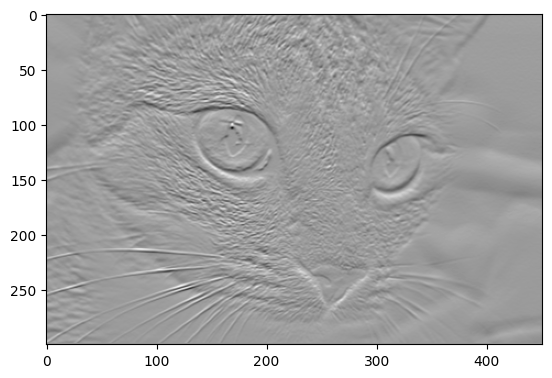

In [4]:
#@title Sorbel Operator {run: 'auto'}
grad_direction = 'Y' #@param ['X', 'Y']

scale = 1
delta = 0
ddepth = cv2.CV_16S

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
if grad_direction == 'X':
    dx, dy = 1, 0
else:
    dx, dy = 0, 1

grad = cv2.Sobel(gray, 
                 ddepth, 
                 dx, 
                 dy, 
                 ksize=3, 
                 scale=scale, 
                 delta=delta, 
                 borderType=cv2.BORDER_DEFAULT)
    
plt.imshow(grad, cmap='gray')
plt.show()

# Edge Canny Algorithm

เป็นอีกวิธีในการหา Edge ของวัตถุในภาพที่เคยได้รับความนิยม ซึ่งมี 4 ขั้นตอน ดังนี้
1. Noise Reduction ลด Noise ด้วย Gaussian Blur
2. Finding Intensity Gradient of the Image ด้วย Sobel Operator
3. Non-maximum Suppression เพื่อหา Pixel ที่เป็น Edge เพียงจุดเดียว โดยเลือกจุดที่มีค่าสูงสุดในบริเวณนั้น
4. Hysteresis Thresholding เป็นการทำ Post-Processing เพื่อแก้ปัญหา Edge ไม่ต่อกันเป็นเส้น

คำนวณโดยใช้คำสั่ง [`canny`](https://scikit-image.org/docs/stable/auto_examples/edges/plot_canny.html)

ลองดูว่าผลลัพธ์ต่างจาก Sobel Operator อย่างไร

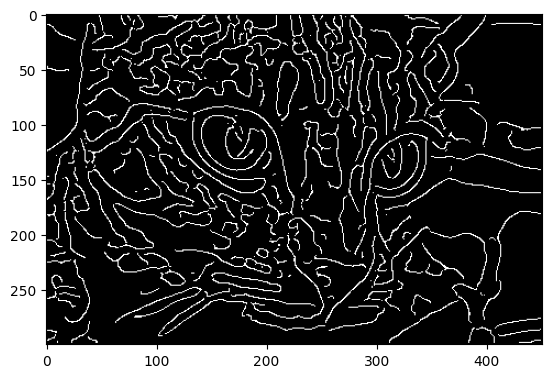

In [5]:
gray = color.rgb2gray(image)
gray = gray*255 / gray.max()
edges = canny(gray, sigma=3, low_threshold=1, high_threshold=20)
plt.imshow(edges, cmap='gray')

## Gabor Filter

เป็นวิธีสำหรับ Texture Analysis เป็นการวิเคราะห์ลวดลายของวัตถุในภาพ ซึ่งประกอบไปด้วย Kernel หลาย ๆ อัน สำหรับวิเคราะห์ลวดลายหลาย ๆ แบบ และหลาย ๆ ขนาดด้วย ซึ่งผลลัพธ์ที่ได้ ก็จะได้เป็นหลาย ๆ ภาพสำหรับสร้างเป็น Feature Vector ของแต่ละ Pixel เพื่อใช้ในการคำนวณวิเคราะห์ลวดลายของ Pixel บริเวณนั้นต่อไป

สามารถคำนวณได้ด้วยฟังก์ชัน `getGaborKernel`

In [6]:
g_kernel = cv2.getGaborKernel((21, 21), 8.0, np.pi/4, 10.0, 0.5, 0, ktype=cv2.CV_32F)

img = image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
filtered_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)

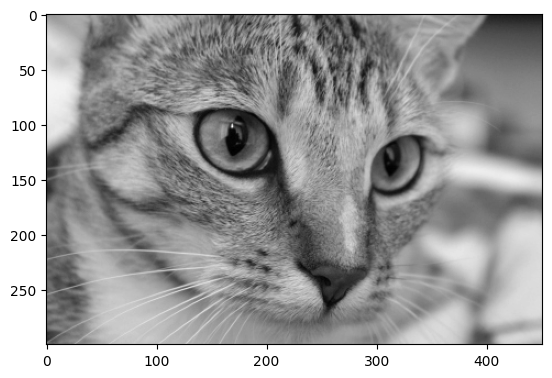

In [7]:
plt.imshow(img, cmap='gray')

ผลลัพธ์ที่ได้จากหนึ่งใน Kernel หลาย ๆ อันของ Gabor Filter

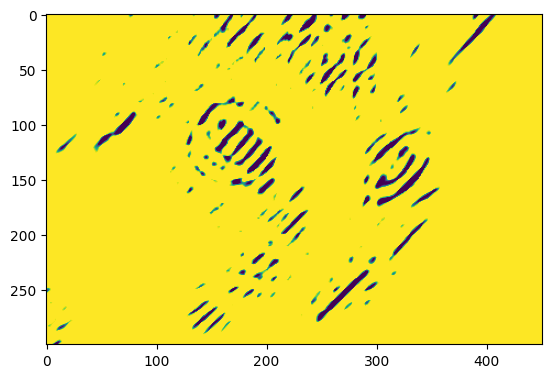

In [8]:
plt.imshow(filtered_img/255.0)

ตัวอย่าง Kernel อันนึง

In [9]:
h, w = g_kernel.shape[:2]
g_kernel = cv2.resize(g_kernel, (3*w, 3*h), interpolation=cv2.INTER_CUBIC)

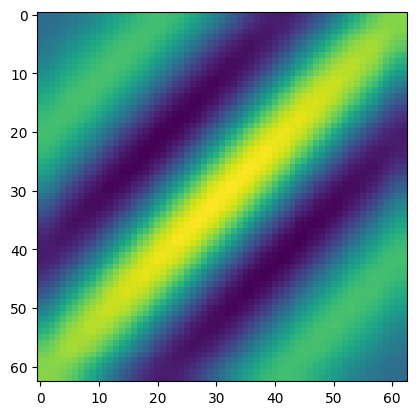

In [10]:
plt.imshow(g_kernel)

----